In [235]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.metrics import r2_score

from statsmodels.api import qqplot, add_constant

import warnings
# 경고창 숨기기
warnings.filterwarnings('ignore') 
# 경고창 다시 나타내기
# warnings.filterwarnings('default')

In [236]:
plt.rcParams['font.family'] = 'NanumGothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [237]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [238]:
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw = df_raw.drop(['WEIGHT_UNIT', "HEIGHT_UNIT"], axis=1)
df_raw_dummy = pd.get_dummies(df_raw, drop_first=True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [239]:
df_raw_y = df_raw_dummy['FAT']
df_raw_x = df_raw_dummy.drop('FAT', axis=1, inplace=False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 14)
train data Y size: (176,)
test data X size: (76, 14)
test data Y size: (76,)


-36.02048952086594


<Axes: >

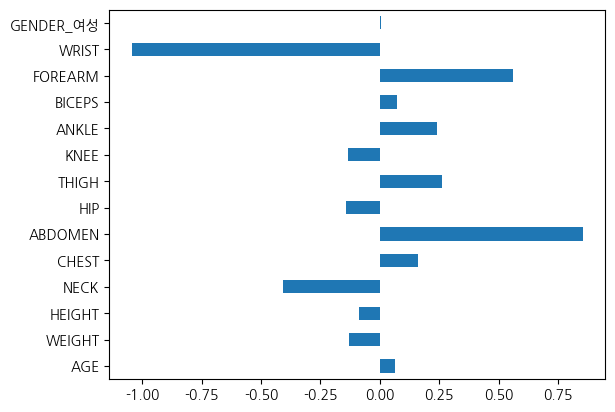

In [240]:
ridge = Ridge(random_state=1234, alpha=1)
ridge.fit(df_train_x, df_train_y)

print(ridge.intercept_)

df_ridge_coef = pd.DataFrame({"Coef":ridge.coef_}, index=df_train_x.columns)
df_ridge_coef

df_ridge_coef.plot.barh(y="Coef", legend=False)

In [241]:
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.7688328070099064
test data의 결정계수 0.6641259577188776
test data의 실제값: 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값: 
 [13.60282604 16.45073408 37.04384853 18.84719908 22.29182243 19.66883071
 16.30261479 12.57672671 14.84682774 23.98304519]


-39.35090439476542


<Axes: >

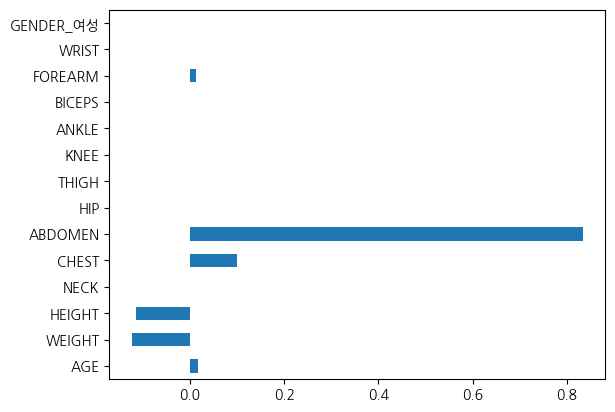

In [242]:
lasso = Lasso(random_state=1234, alpha=1)
lasso.fit(df_train_x, df_train_y)

print(lasso.intercept_)

df_lasso_coef = pd.DataFrame({"Coef":lasso.coef_}, index=df_train_x.columns)
df_lasso_coef

df_lasso_coef.plot.barh(y="Coef", legend=False)

In [243]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.7448823019911712
test data의 결정계수 0.6397843604404867
test data의 실제값: 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값: 
 [14.47038363 16.28754934 33.67464732 18.10744338 23.79126879 19.65277966
 14.95597729  9.61780438 16.5146437  23.5350198 ]


-47.00875497399707


<Axes: >

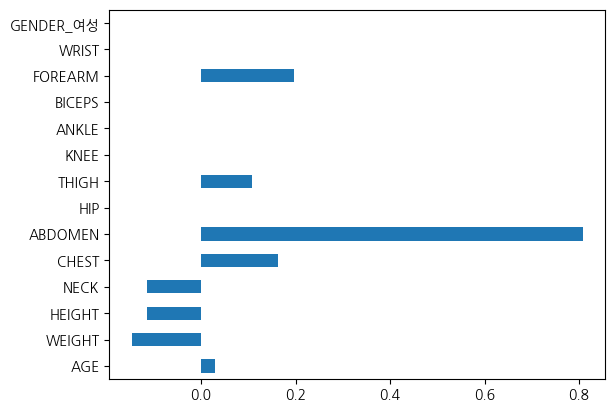

In [244]:
elastic = ElasticNet(random_state=1234, alpha=1, l1_ratio = 0.5)
elastic.fit(df_train_x, df_train_y)

print(elastic.intercept_)

df_elastic_coef = pd.DataFrame({"Coef":elastic.coef_}, index=df_train_x.columns)
df_elastic_coef

df_elastic_coef.plot.barh(y="Coef", legend=False)

In [245]:
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print("train data의 결정계수", r2_score(df_train_y, train_pred))
print("test data의 결정계수", r2_score(df_test_y, test_pred))

print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

train data의 결정계수 0.7549442655494084
test data의 결정계수 0.636671178295827
test data의 실제값: 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값: 
 [13.73844662 16.36476248 34.61249368 18.55642767 23.40560299 19.81954034
 15.17420329 10.47756547 16.18488347 23.83687672]


In [246]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import export_graphviz
import graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [247]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand=True)

df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')

df_raw = df_raw.drop(['WEIGHT_UNIT', 'HEIGHT_UNIT'], axis=1)

df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_남성,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,1,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,1,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,1,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,0,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,0,1


In [248]:
df_raw_y = df_raw_dummy['FAT']
df_raw_x = df_raw_dummy.drop('FAT', axis=1, inplace=False)

In [249]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (176, 15)
train data Y size: (176,)
test data X size: (76, 15)
test data Y size: (76,)


In [250]:
tree_uncustomize = DecisionTreeRegressor(random_state=1234)
tree_uncustomize.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(tree_uncustomize.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(tree_uncustomize.score(df_test_x, df_test_y)))

Score on training set: 1.000
Score on test set: 0.377


In [251]:
tree_uncustomize.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1234,
 'splitter': 'best'}

In [252]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state=1234,
                                 min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

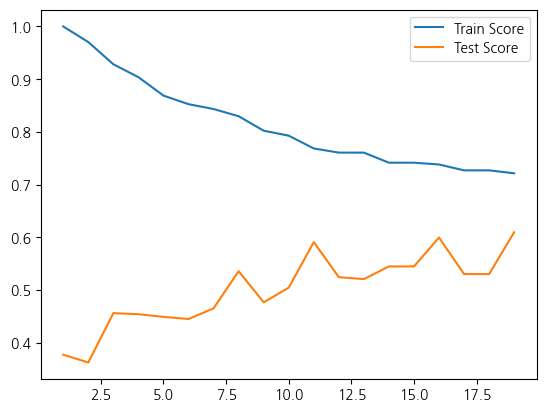

In [253]:
df_score_leaf.round(3)

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='-', label='Test Score')
plt.legend()

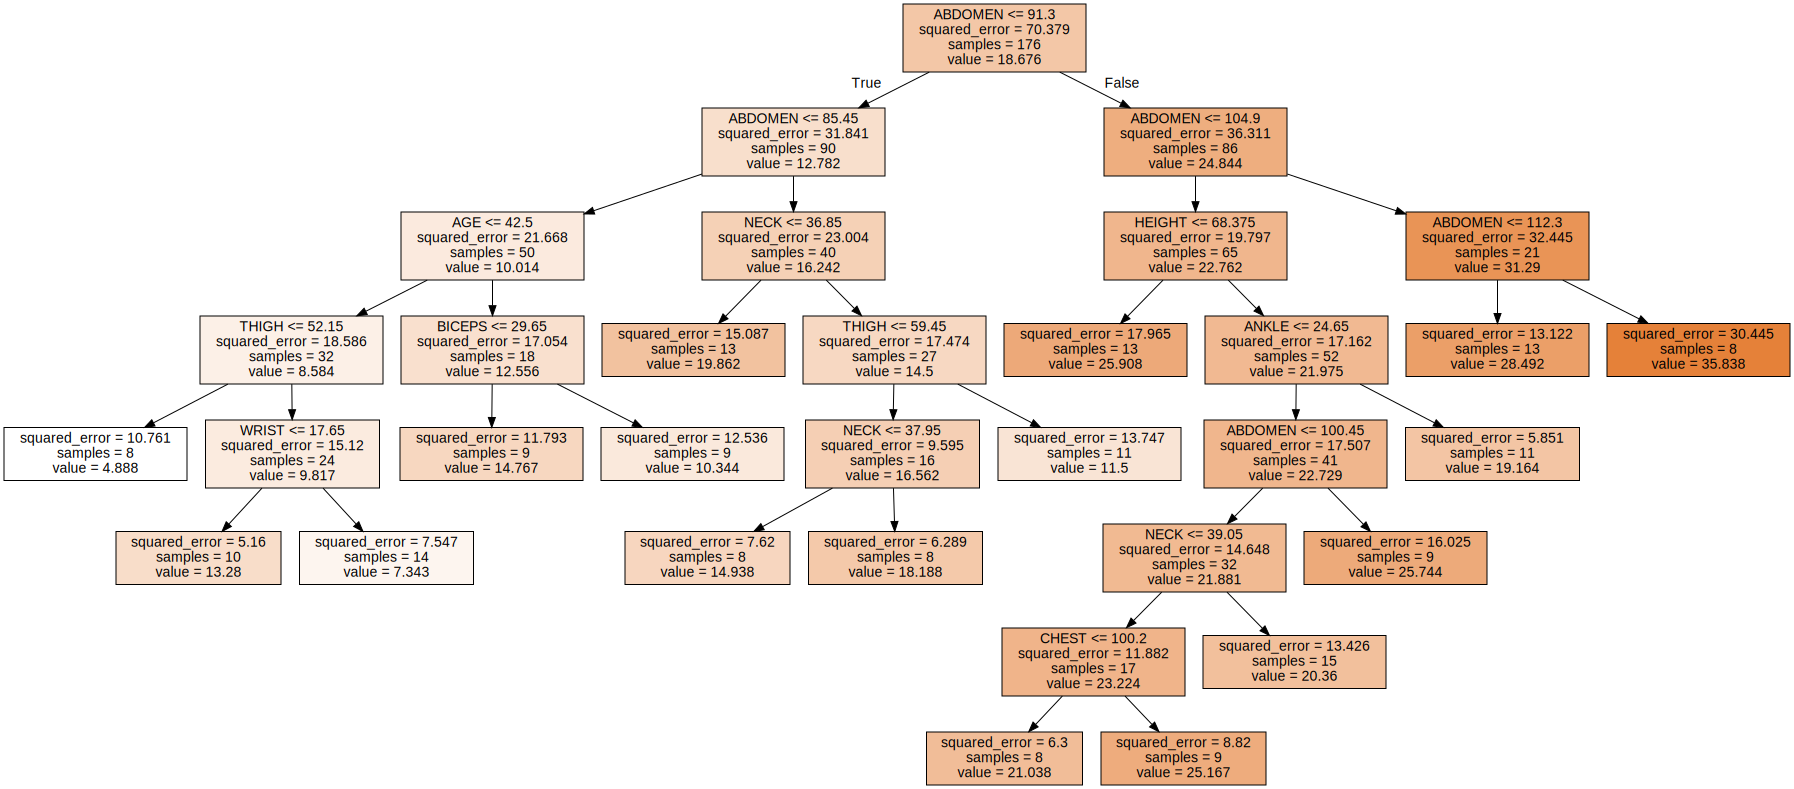

In [254]:
v_feature_name = df_train_x.columns

tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open('tree_leaf.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

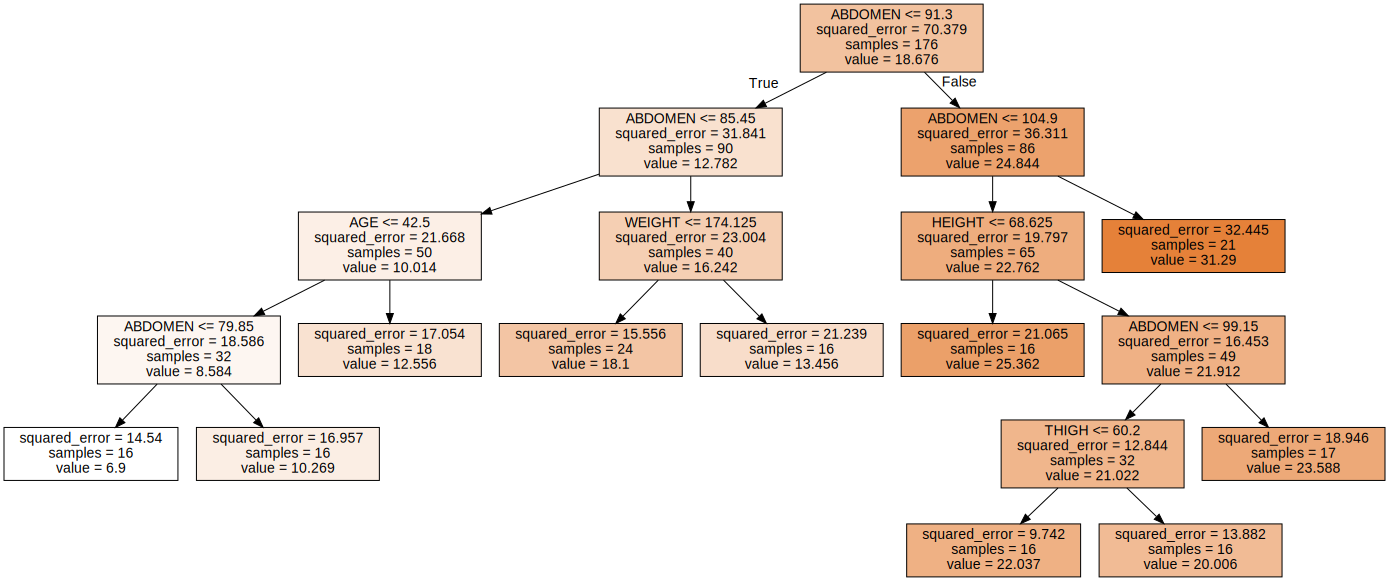

In [255]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_leaf.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [256]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(1, 20)]
for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8,
                                 min_samples_split=v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSamplesLeaf'] = para_leaf
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.830,0.536
1,2,0.830,0.536
2,3,0.830,0.536
3,4,0.830,0.536
4,5,0.830,0.536
5,6,0.830,0.536
6,7,0.830,0.536
7,8,0.830,0.536
8,9,0.821,0.557
9,10,0.813,0.581


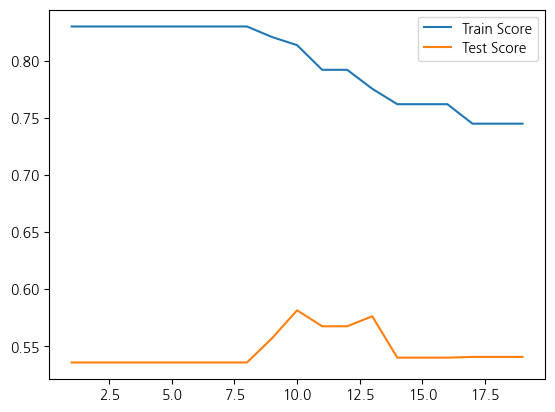

In [257]:
df_score_split.round(3)

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='-', label='Test Score')
plt.legend()

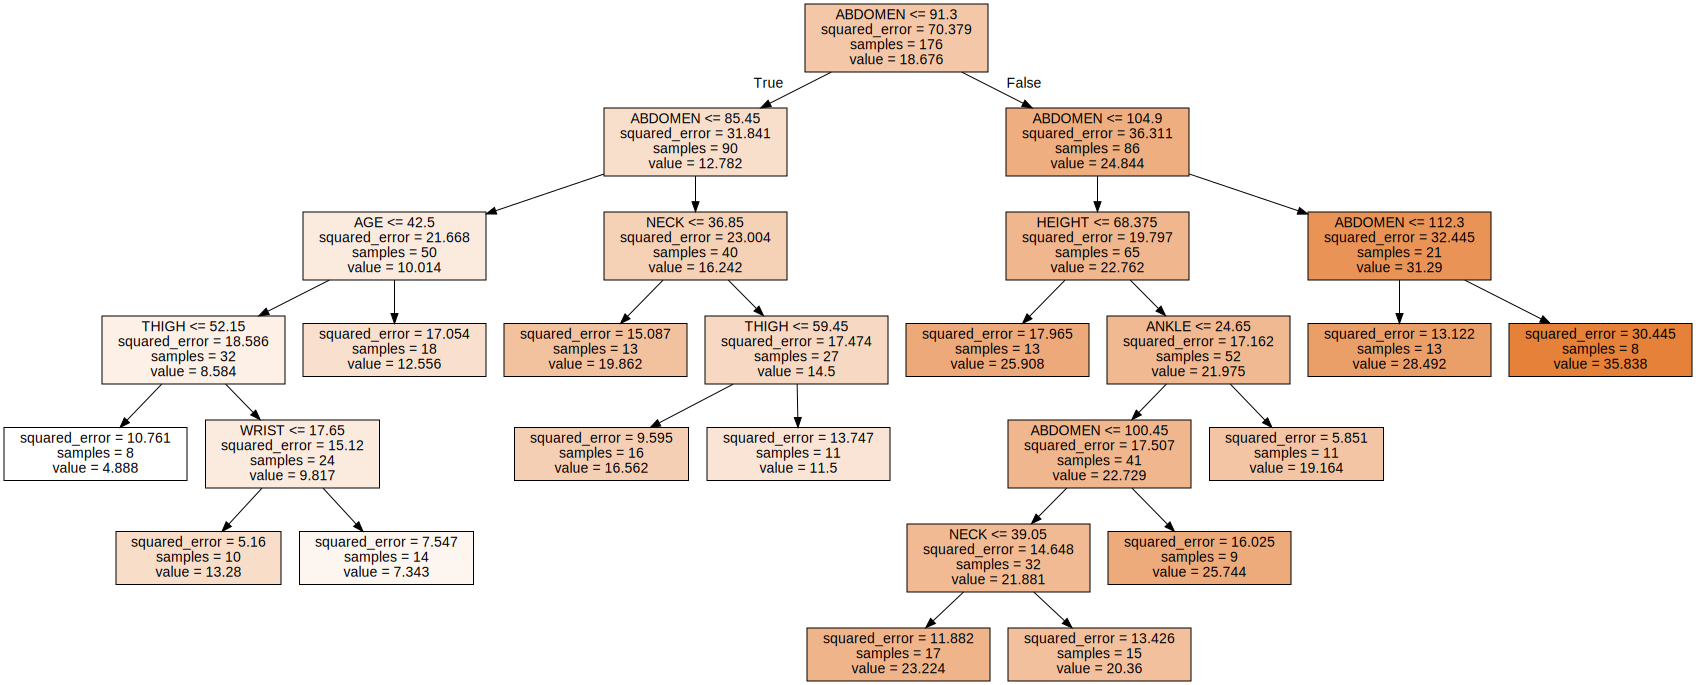

In [258]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

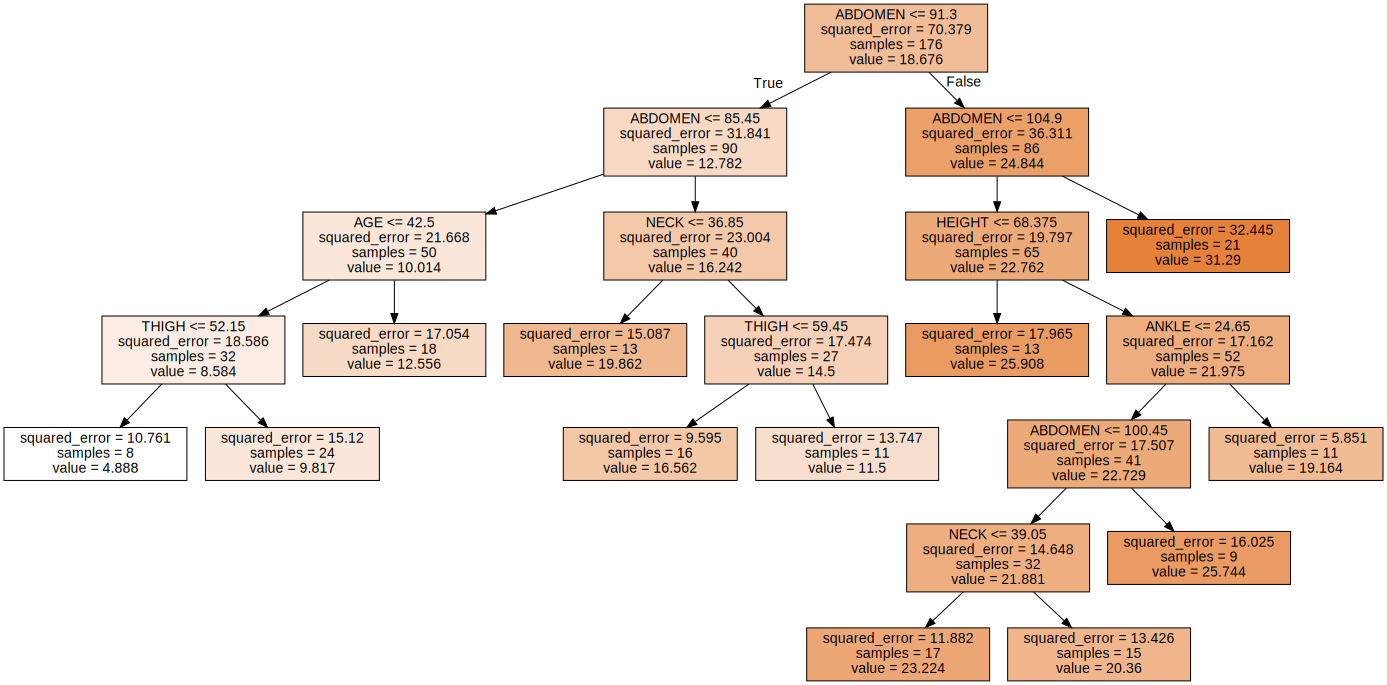

In [259]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=26)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_split.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_split.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [260]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8,
                                 min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

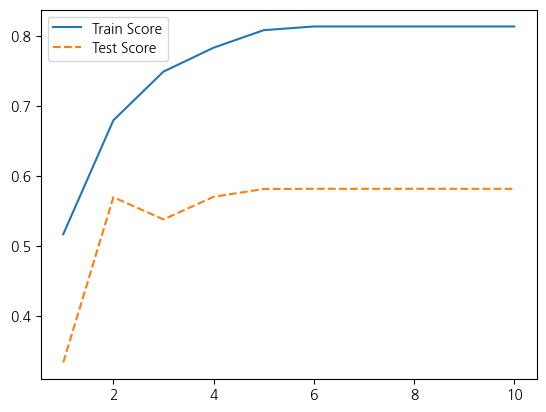

In [261]:
df_score_depth.round(3)

plt.plot(para_depth, train_score, linestyle='-', label='Train Score')
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.legend()

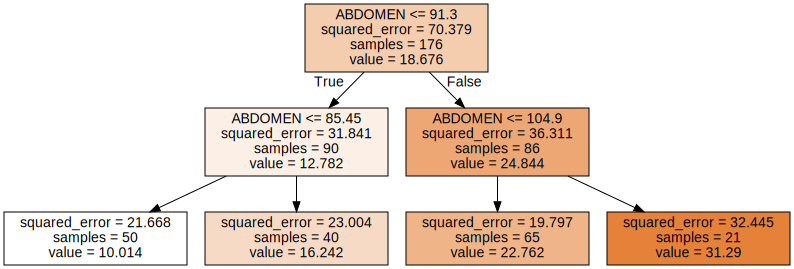

In [262]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=2)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

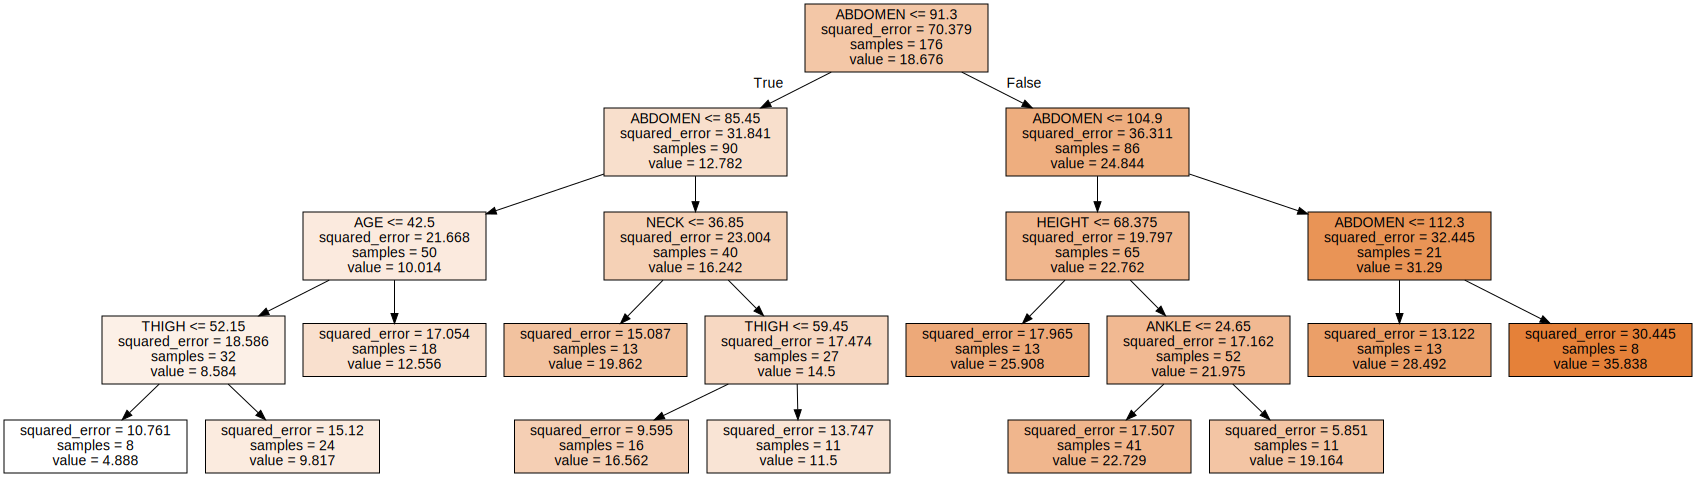

In [263]:
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file='tree_depth.dot',
                feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [264]:
v_feature_name = df_train_x.columns
tree_final = DecisionTreeRegressor(min_samples_leaf = 8, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)
tree_final.get_params()

test_pred = tree_final.predict(df_test_x)
print('test data의 실제값: \n', df_test_y[:10])
print('test data의 예측값: \n', test_pred[:10])

test data의 실제값: 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값: 
 [12.55555556 22.72926829 35.8375     16.5625     25.90769231 16.5625
 12.55555556  4.8875     16.5625     22.72926829]


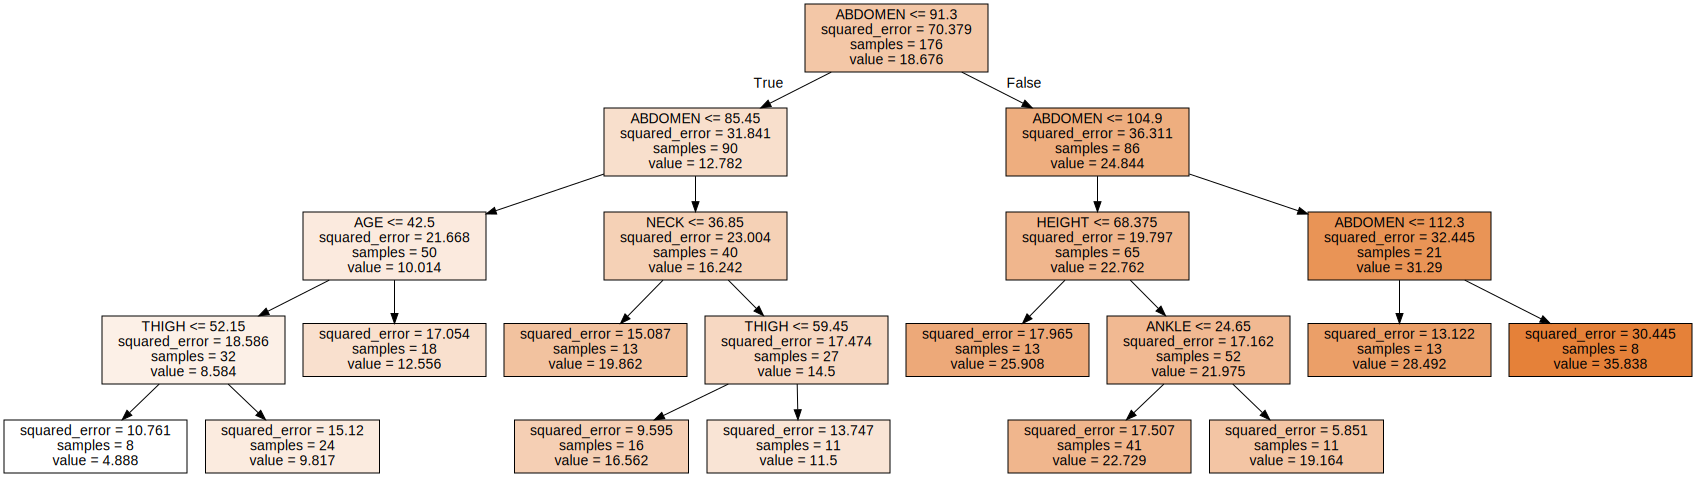

In [265]:
export_graphviz(tree_final, out_file="tree_final.dot",
                feature_names=v_feature_name, impurity=True, filled=True)

with open("tree_final.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [266]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

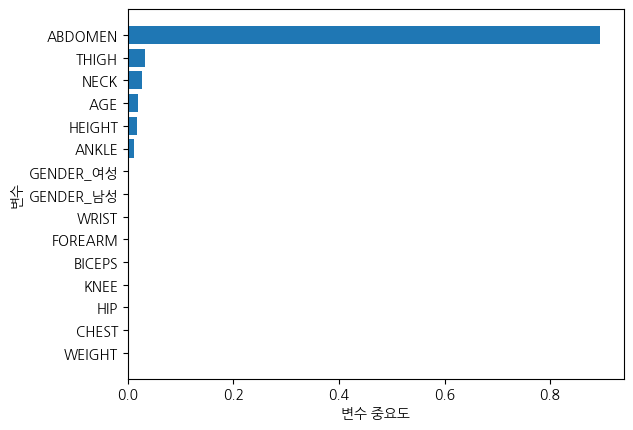

In [267]:
df_importance.sort_values('Importance', ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [268]:
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning 제거
warnings.filterwarnings(action='ignore')
estimator = DecisionTreeRegressor()

param_grid = {"criterion" : ['squeared_error', 'friedman_mse', 'absolute_error'], 'max_features': ['sqrt', 'log2'],
              'max_depth': para_depth, 'min_samples_split': para_split,
              'min_samples_leaf': para_leaf}

grid_dt = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest parameter: \n{}".format(grid_dt.best_params_))
print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='log2', min_samples_leaf=7,
                      min_samples_split=22)

best parameter: 
{'criterion': 'friedman_mse', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 22}

best score: 
0.581


## 랜덤 포레스트

In [269]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz



from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV


In [270]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.957
Score on test set: 0.609


In [271]:
rf_uncustomized.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [272]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_n  = pd.DataFrame()
df_score_n['n_estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

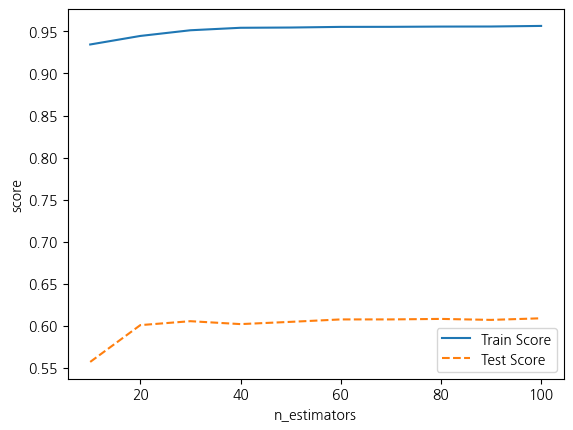

In [273]:
df_score_n.round(3)

plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [274]:
train_score = []; test_score = []
para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_leaf  = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

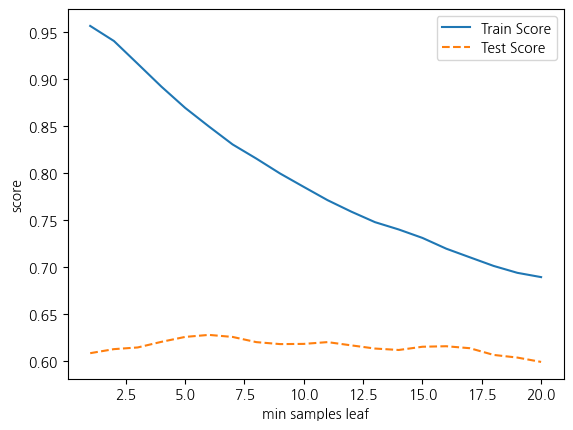

In [275]:
df_score_leaf.round(3)

plt.plot(para_leaf, train_score, linestyle='-', label="Train Score")
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [276]:
train_score = []; test_score = []
para_split = [n_split*2 for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_leaf  = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_split
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

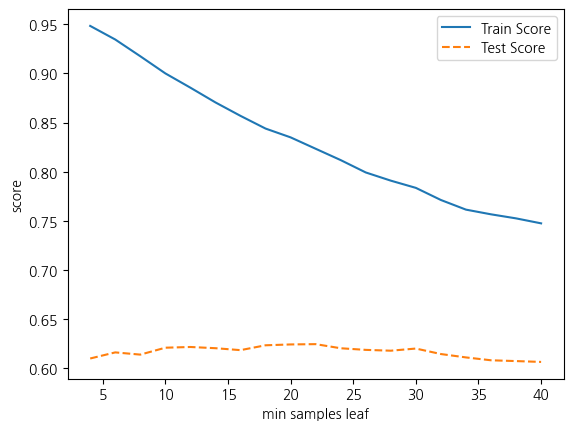

In [277]:
df_score_split.round(3)

plt.plot(para_split, train_score, linestyle='-', label="Train Score")
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [278]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(random_state=1234, n_estimators=100,
                                 min_samples_leaf=6, min_samples_split=14,  max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

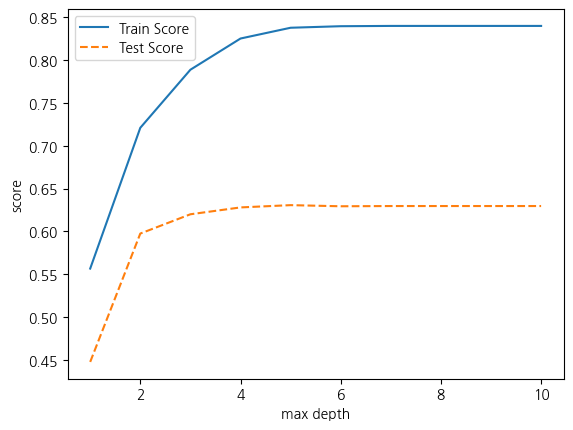

In [279]:
df_score_depth.round(3)

plt.plot(para_depth, train_score, linestyle='-', label="Train Score")
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('max depth')
plt.legend()

In [280]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_samples_split=14, max_depth=4)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set: 0.825
Score on test set: 0.628


In [281]:
test_pred = rf_final.predict(df_test_x)
print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

rf_final.get_params()

test data의 실제값: 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값: 
 [10.06274089 18.68386083 31.95349247 16.72552283 23.81671058 18.64050332
 12.13948727  6.91973907 16.46891903 24.86969658]


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1234,
 'verbose': 0,
 'warm_start': False}

In [282]:
rf_final

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=1234)

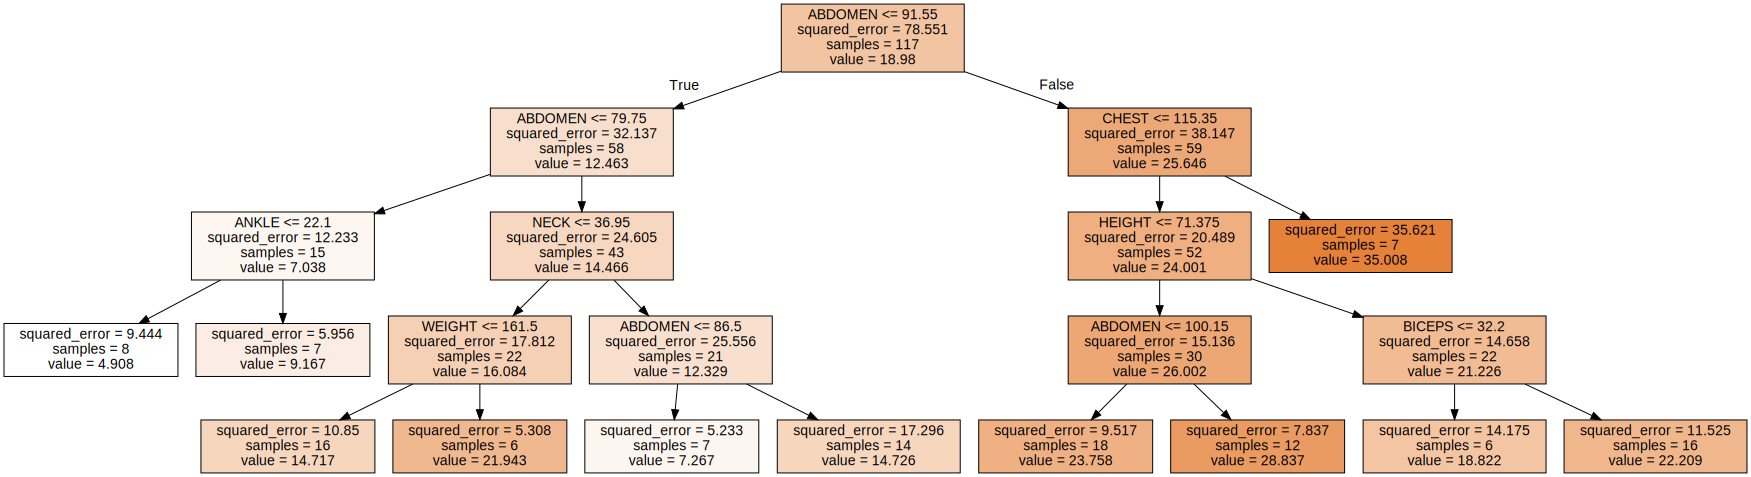

In [283]:
v_feature_name = df_train_x.columns
export_graphviz(rf_final[0], out_file='rfr_final_0.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('rfr_final_0.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

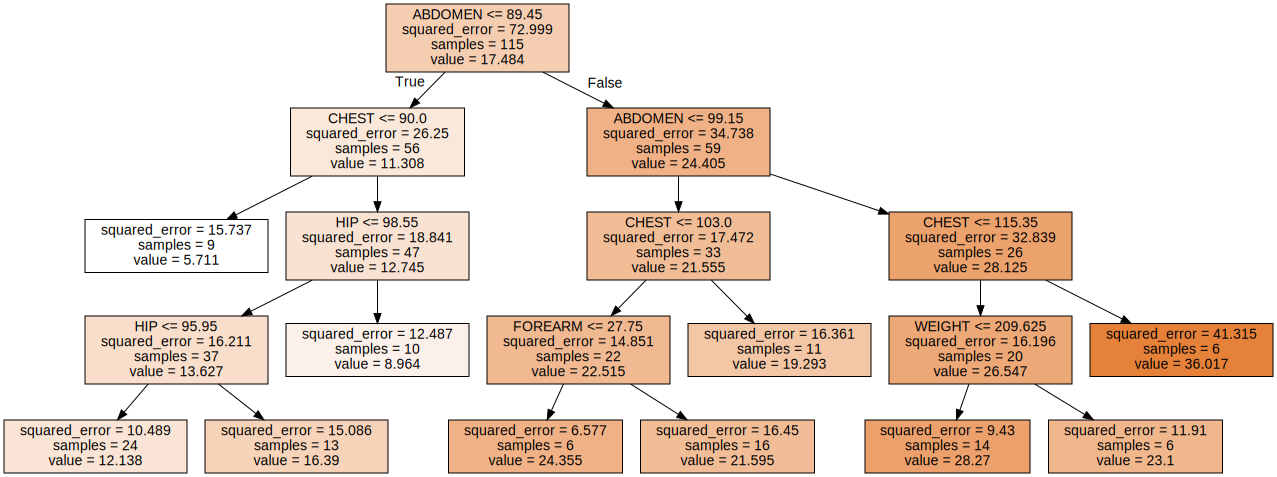

In [284]:
export_graphviz(rf_final[1], out_file='rfr_final_1.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('rfr_final_1.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

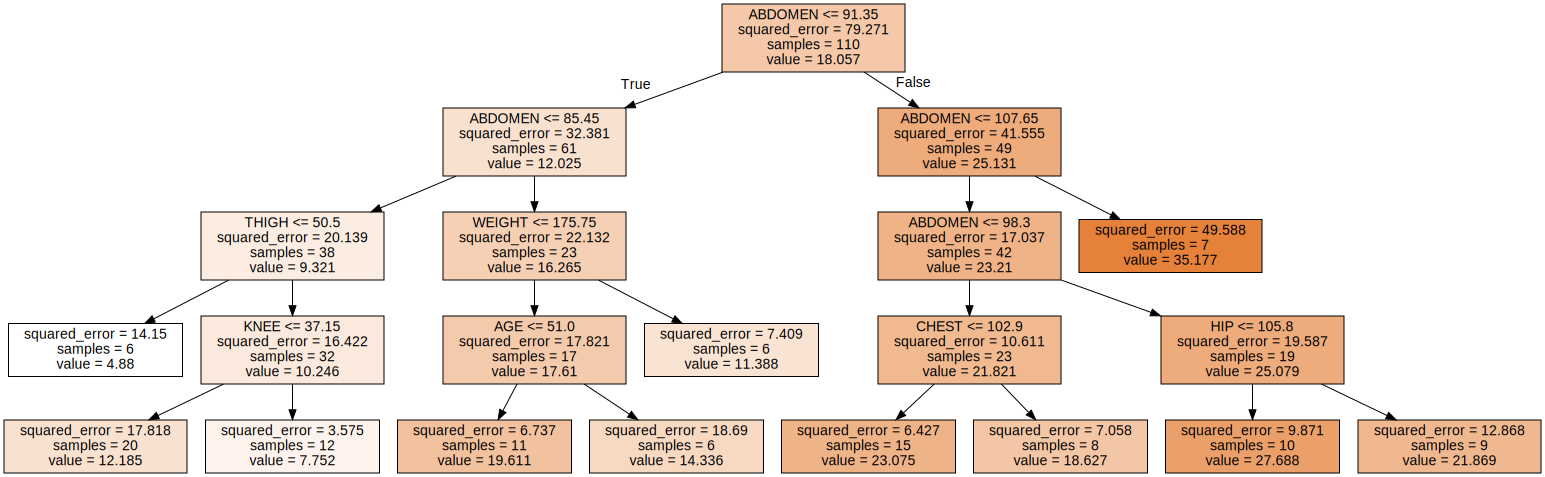

In [285]:
export_graphviz(rf_final[10], out_file='rfr_final_10.dot', feature_names=v_feature_name, impurity=True, filled=True)
with open('rfr_final_10.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [286]:
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)



,Feature,Importance
5,ABDOMEN,0.843
4,CHEST,0.036
2,HEIGHT,0.032
0,AGE,0.014
6,HIP,0.014
7,THIGH,0.011
3,NECK,0.010
12,WRIST,0.010
8,KNEE,0.010
1,WEIGHT,0.008


Text(0, 0.5, '변수')

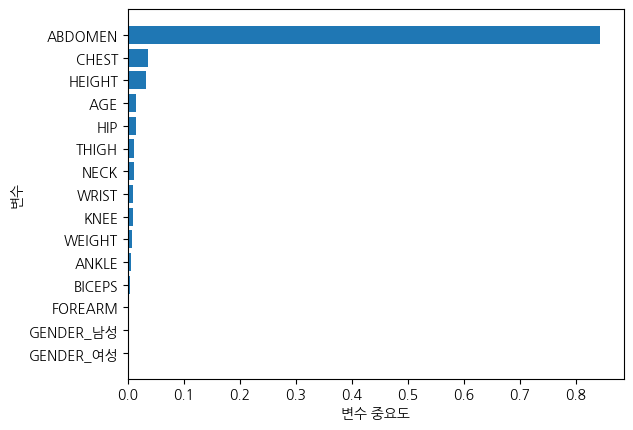

In [287]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')

In [289]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {"max_depth": para_depth, "min_samples_split": para_split, "min_samples_leaf": para_leaf}

grid_rf = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_rf.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest parameter: \n".format(grid_rf.best_params_))
print("\nbest score:\n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=6, min_samples_leaf=3, min_samples_split=14,
                      random_state=1234)

best parameter: 


best score:
0.678


## 그래디언트 부스팅

In [ ]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz

import graphviz



from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV


In [ ]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

In [ ]:
gb_uncustomized.get_params()

In [ ]:
train_score = []; test_score = []
para_n_tree = [n_tree * 10 for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_n  = pd.DataFrame()
df_score_n['Estimators'] = para_n_tree
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [ ]:
df_score_n.round(3)

plt.plot(para_n_tree, train_score, linestyle='-', label='Train Score')
plt.plot(para_n_tree, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('n_estimators')
plt.legend()

In [ ]:
train_score = []; test_score = []
para_n_tree = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_n  = pd.DataFrame()
df_score_n['Estimators'] = para_leaf
df_score_n['TrainScore'] = train_score
df_score_n['TestScore'] = test_score

In [ ]:
df_score_leaf.round(3)

plt.plot(para_leaf, train_score, linestyle='-', label='Train Score')
plt.plot(para_leaf, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [ ]:
train_score = []; test_score = []
para_split = [n_split for n_split in range(1, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11,
                                 min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_split  = pd.DataFrame()
df_score_split['MinSamplesSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [ ]:
df_score_split.round(3)

plt.plot(para_split, train_score, linestyle='-', label="Train Score")
plt.plot(para_split, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [ ]:
train_score = []; test_score = []
para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30,
                                 min_samples_leaf=11, min_samples_split=22,  max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_depth  = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [ ]:
df_score_depth.round(3)

plt.plot(para_depth, train_score, linestyle='-', label="Train Score")
plt.plot(para_depth, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('depth')
plt.legend()

In [ ]:
train_score = []; test_score = []
para_lr = [lr*0.1 for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(random_state=1234, n_estimators=30,
                                 min_samples_leaf=11, min_samples_split=22,  learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))


df_score_lr  = pd.DataFrame()
df_score_lr['LearningRate'] = para_lr
df_score_lr['TrainScore'] = train_score
df_score_lr['TestScore'] = test_score

In [ ]:
df_score_lr.round(3)

plt.plot(para_lr, train_score, linestyle='-', label="Train Score")
plt.plot(para_lr, test_score, linestyle='--', label='Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [ ]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22, max_depth=4, learning_rate=0.1)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set: {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

In [ ]:
test_pred = gb_final.predict(df_test_x)
print("test data의 실제값: \n", df_test_y[:10])
print("test data의 예측값: \n", test_pred[:10])

rf_final.get_params()

In [ ]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)


In [ ]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates, width=df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수 중요도")
plt.ylabel('변수')


In [ ]:
estimator = GradientBoostingRegressor(random_state=1234)
param_grid = {"criterion": ['mse', 'friedman_mse', 'mae'], 'max_features': ['auto', 'sqrt', 'log2'], 'learning_rate':para_lr,
              'max_depth':para_depth, 'min_samples_leaf':para_leaf}
grid_gb = GridSearchCV(estimator, param_grid, scoring='r2', n_jobs=-1)
grid_gb.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest parameter: \n".format(grid_gb.best_params_))
print("\nbest score:\n{}".format(grid_gb.best_score_round(3)))

## 모델 평가 및 선정

In [325]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error



In [326]:
df_raw = pd.read_csv('../실습파일/2. Big Data 분석/체질검사.csv', encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [327]:
df_raw[['WEIGHT', 'WEIGHT_UNIT']] = df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT', 'HEIGHT_UNIT']] = df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT'] = df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT'] = df_raw['HEIGHT'].astype('float64')
df_raw = df_raw.drop(['WEIGHT_UNIT', "HEIGHT_UNIT"], axis=1)
df_raw_dummy = pd.get_dummies(df_raw, drop_first=True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [328]:
df_raw_y = df_raw_dummy['FAT']
df_raw_x = df_raw_dummy.drop('FAT', axis=1, inplace=False)


df_train, df_test = train_test_split(df_raw_dummy, test_size=0.3, random_state=999)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size=0.3, random_state=1234)

print("train data size for regression: {}".format(df_train.shape))
print("test data size for regression: {}".format(df_test.shape))
print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))
print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data size for regression: (176, 15)
test data size for regression: (76, 15)
train data X size: (176, 14)
train data Y size: (176,)
test data X size: (76, 14)
test data Y size: (76,)


In [329]:
lr_model = smf.ols(formula='FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM', data=df_train)
lr_result = lr_model.fit()
print(lr_result.summary())

dt_model = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
dt_model.fit(df_train_x, df_train_y)

rf_model = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=8, min_samples_split=20,
                                 max_depth=4)
rf_model.fit(df_train_x, df_train_y)

gb_model = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11, min_samples_split=22,
                                 max_depth=4, learning_rate=0.1)
gb_model.fit(df_train_x, df_train_y)

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     107.0
Date:                Tue, 05 Mar 2024   Prob (F-statistic):           1.23e-50
Time:                        18:16:11   Log-Likelihood:                -500.52
No. Observations:                 176   AIC:                             1013.
Df Residuals:                     170   BIC:                             1032.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8281      7.885      0.232      0.8

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=1234)

In [330]:
models = ['회귀분석', '의사결정나무', '랜덤 포레스트', '그래디언트 부스팅']

mse, rmse, mae, mape = [], [], [], []


In [331]:
lr_y_pred = lr_result.predict(df_test)

mse.append(mean_squared_error(df_test['FAT'], lr_y_pred))
rmse.append(mean_squared_error(df_test['FAT'], lr_y_pred, squared=False))
mae.append(mean_absolute_error(df_test['FAT'], lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'], lr_y_pred))

In [332]:
dt_y_pred = dt_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, dt_y_pred))
rmse.append(mean_squared_error(df_test_y, dt_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, dt_y_pred))

In [333]:
rf_y_pred = rf_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, rf_y_pred))
rmse.append(mean_squared_error(df_test_y, rf_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, rf_y_pred))

In [334]:
gb_y_pred = gb_model.predict(df_test_x)

mse.append(mean_squared_error(df_test_y, gb_y_pred))
rmse.append(mean_squared_error(df_test_y, gb_y_pred, squared=False))
mae.append(mean_absolute_error(df_test_y, gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y, gb_y_pred))

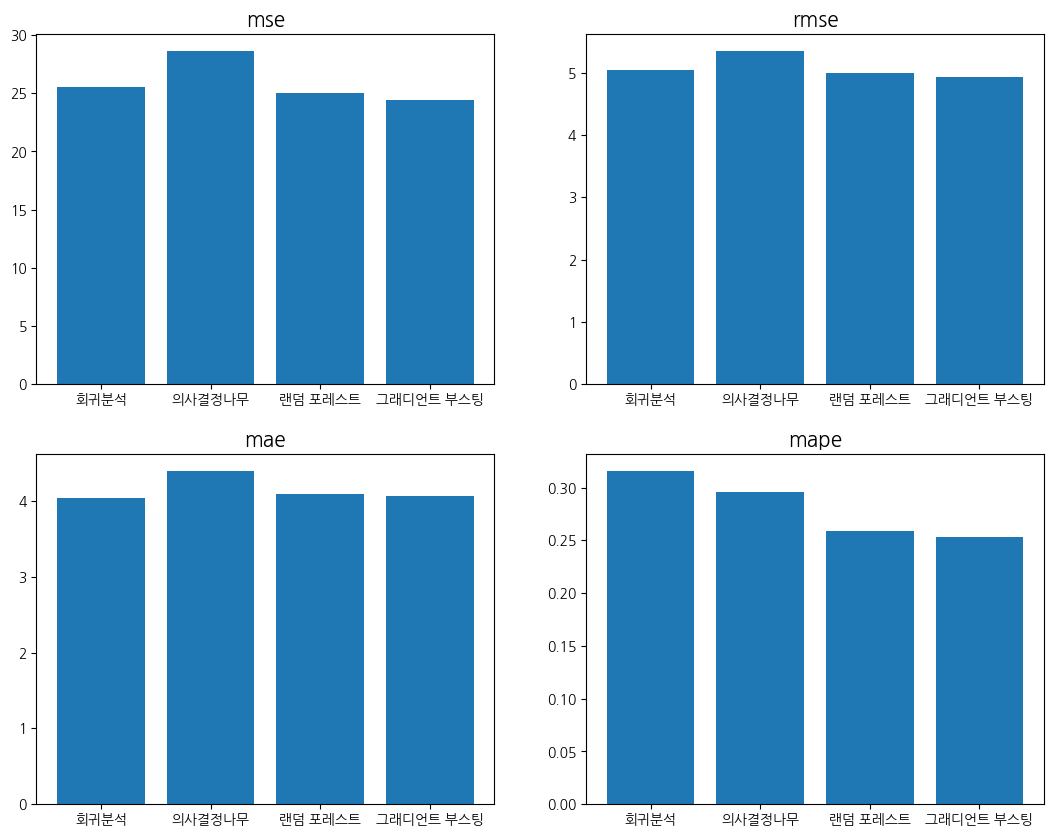

In [335]:
fig, ax = plt.subplots(2, 2, figsize=(13,10))
ax[0,0].bar(models, mse)
ax[0,0].set_title('mse').set_fontsize(15)

ax[0,1].bar(models, rmse)
ax[0,1].set_title('rmse').set_fontsize(15)

ax[1,0].bar(models, mae)
ax[1,0].set_title('mae').set_fontsize(15)

ax[1,1].bar(models, mape)
ax[1,1].set_title('mape').set_fontsize(15)